# 1. Chargement et exploration initiale des données
• Importer les bibliothèques nécessaires (pandas, numpy, matplotlib, seaborn, 
sklearn) <br>
• Charger le dataset <br>
• Afficher les premières lignes et les informations de base (types de données, 
statistiques descriptives

In [3]:
#Projet Python pour data sciences 
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sb, sklearn as sk
df=pd.read_csv("kc_house_data.csv")

df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [5]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


# 2. Nettoyage et préparation des données
• Identifier et gérer les valeurs manquantes <br>
• Utiliser des techniques comme l'imputation par la moyenne/médiane ou 
des méthodes plus avancées <br>
• Détecter et traiter les valeurs aberrantes<br>
• Utiliser la méthode IQR (IQR = Q3 - Q1) ou z-score pour identifier les 
outliers<br>
• Décider de les supprimer ou de les transformer selon le contexte


In [6]:
missing_values = df.isnull().sum()
print("Valeurs manquantes par colonne :")
print(missing_values[missing_values > 0])

Valeurs manquantes par colonne :
Series([], dtype: int64)


In [7]:
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return lower_bound, upper_bound, len(outliers)

columns_to_analyze = ['price', 'sqft_living', 'sqft_lot', 'sqft_above', 'bathrooms', 'grade']
outliers_summary = {}

for column in columns_to_analyze:
    lower, upper, outliers_count = detect_outliers_iqr(df, column)
    outliers_summary[column] = {
        "lower_bound": lower,
        "upper_bound": upper,
        "outliers_count": outliers_count,
    }

# Afficher le résumé des valeurs aberrantes
outliers_df = pd.DataFrame(outliers_summary).T
outliers_df.index.name = "Variable"
print("\nValeurs aberrantes (IQR) :")
print(outliers_df)


Valeurs aberrantes (IQR) :
             lower_bound  upper_bound  outliers_count
Variable                                             
price        -162625.000  1129575.000          1146.0
sqft_living     -257.500     4234.500           572.0
sqft_lot       -3432.000    19160.000          2425.0
sqft_above      -340.000     3740.000           611.0
bathrooms          0.625        3.625           571.0
grade              5.500        9.500          1911.0


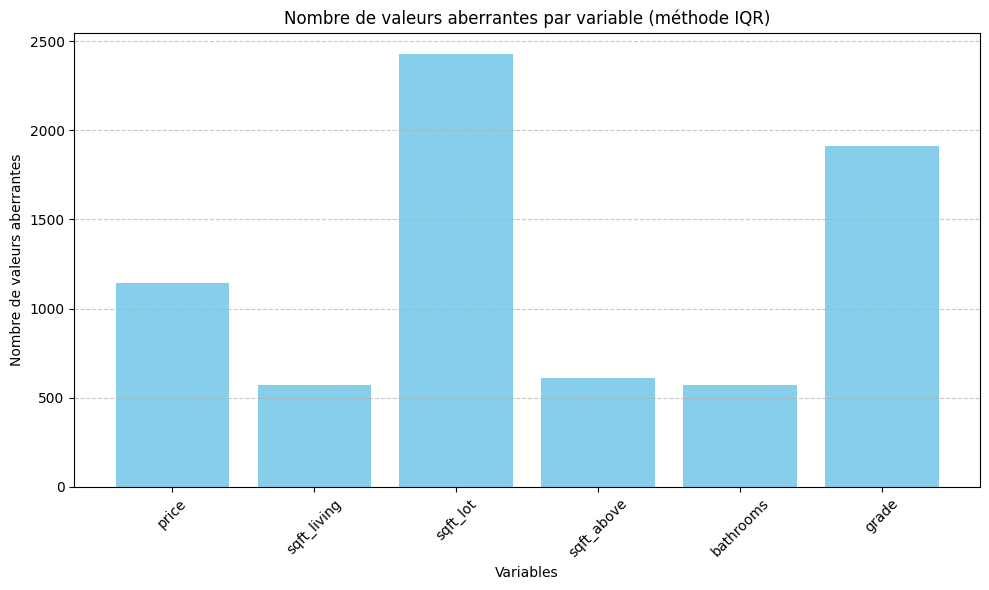

In [8]:
variables = outliers_df.index
outliers_count = outliers_df['outliers_count']

# Création du graphique
plt.figure(figsize=(10, 6))
plt.bar(variables, outliers_count, color='skyblue')
plt.title("Nombre de valeurs aberrantes par variable (méthode IQR)")
plt.xlabel("Variables")
plt.ylabel("Nombre de valeurs aberrantes")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

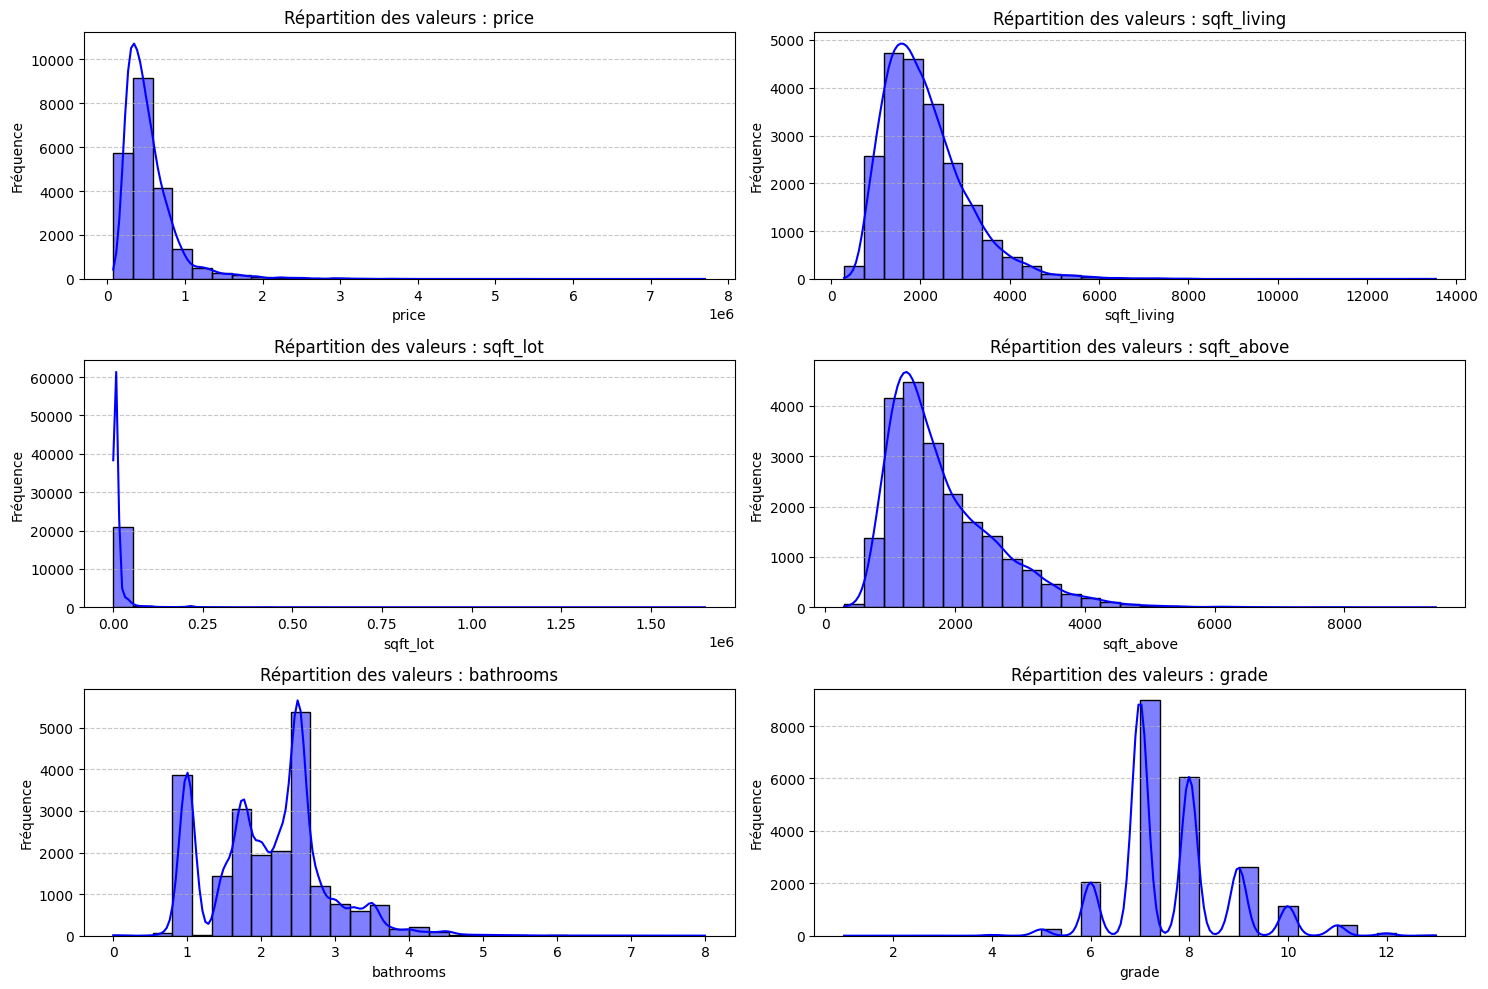

In [9]:
columns_to_visualize = ['price', 'sqft_living', 'sqft_lot', 'sqft_above', 'bathrooms', 'grade']

# Créer des graphiques pour chaque colonne
plt.figure(figsize=(15, 10))
for i, column in enumerate(columns_to_visualize, 1):
    plt.subplot(3, 2, i)
    sb.histplot(df[column], kde=True, bins=30, color='blue')
    plt.title(f"Répartition des valeurs : {column}")
    plt.xlabel(column)
    plt.ylabel("Fréquence")
    plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [10]:
# les sqft_lot ont des valeurs immenses qui pourraient représenter des 
# terrains industriels ou commerciaux, on supprime les lignes associées avec 
# les valeurs aberrantes 

# Suppression des valeurs aberrantes pour sqft_lot
def remove_outliers_sqft_lot(data, column):
    Q1 = data[column].quantile(0.25)  # Premier quartile
    Q3 = data[column].quantile(0.75)  # Troisième quartile
    IQR = Q3 - Q1  # Interquartile Range
    upper_bound = Q3 + 1.5 * IQR  # Seulement borne supérieure
    return data[data[column] <= upper_bound]  # Filtrer les lignes en-dessous de la borne supérieure

# Supprimer les lignes avec des sqft_lot trop grands
df = remove_outliers_sqft_lot(df, 'sqft_lot')

# Vérifier la nouvelle taille du dataset
print(f"Nombre de lignes après suppression des valeurs aberrantes : {df.shape[0]}")


Nombre de lignes après suppression des valeurs aberrantes : 19188


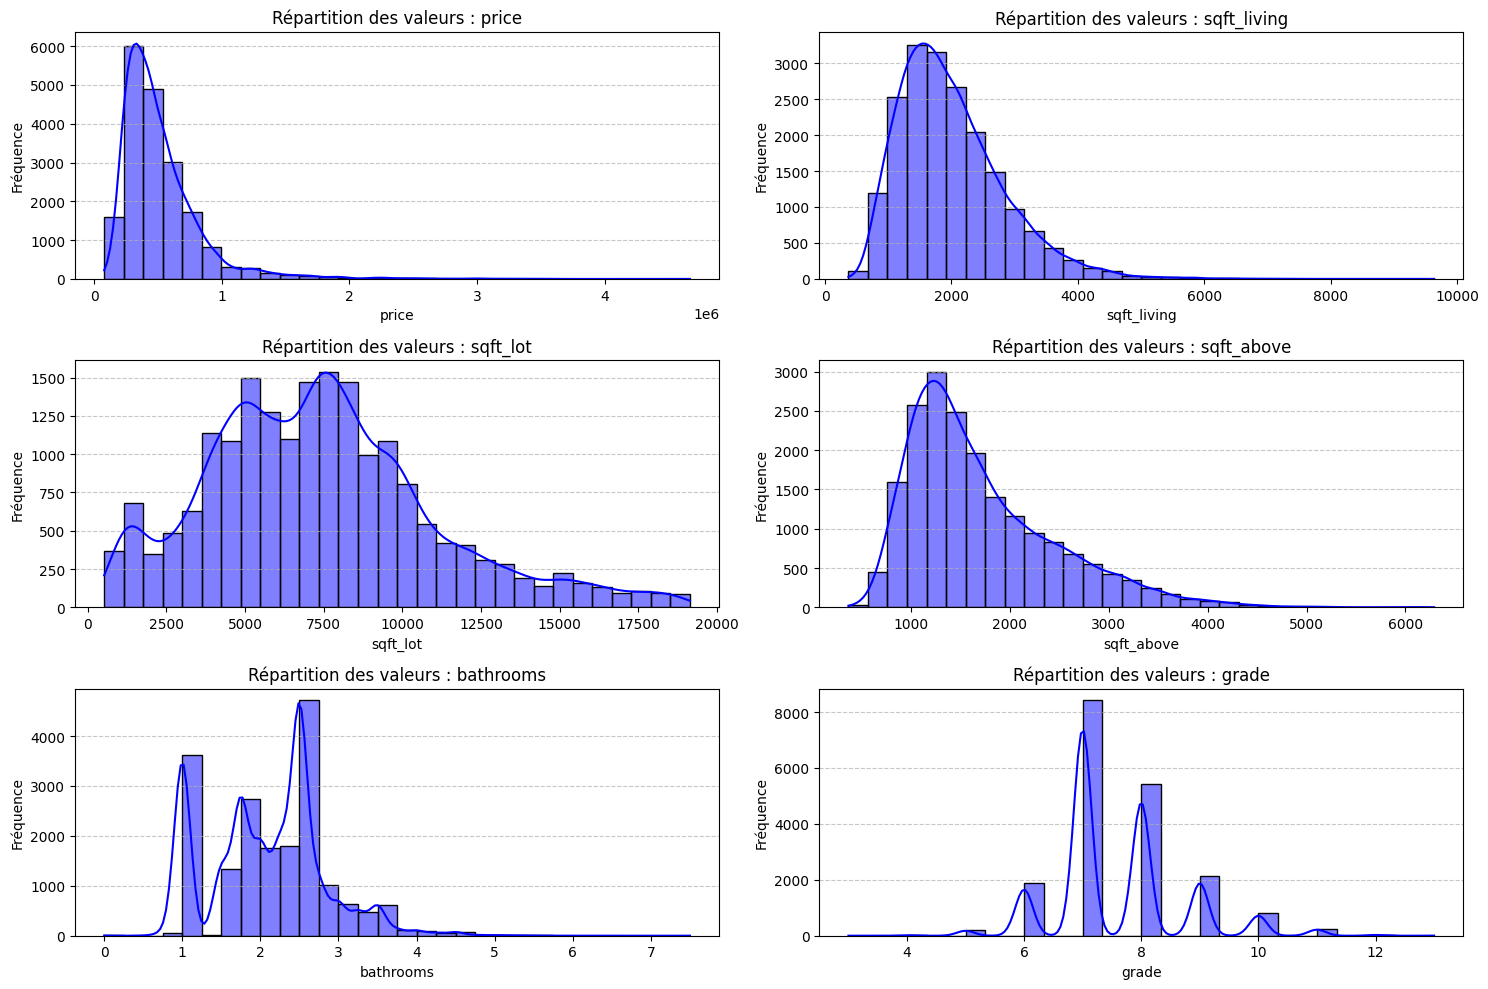

In [11]:
columns_to_visualize = ['price', 'sqft_living', 'sqft_lot', 'sqft_above', 'bathrooms', 'grade']

# Créer des graphiques pour chaque colonne
plt.figure(figsize=(15, 10))
for i, column in enumerate(columns_to_visualize, 1):
    plt.subplot(3, 2, i)
    sb.histplot(df[column], kde=True, bins=30, color='blue')
    plt.title(f"Répartition des valeurs : {column}")
    plt.xlabel(column)
    plt.ylabel("Fréquence")
    plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

# 3. Analyse exploratoire des données (EDA)
• Visualiser la distribution des variables (histogrammes, boxplots) <br>
• Analyser les corrélations entre les variables (heatmap de corrélation)<br>
• Créer des visualisations pertinentes pour comprendre les relations entre les 
variables et le statut diabétique

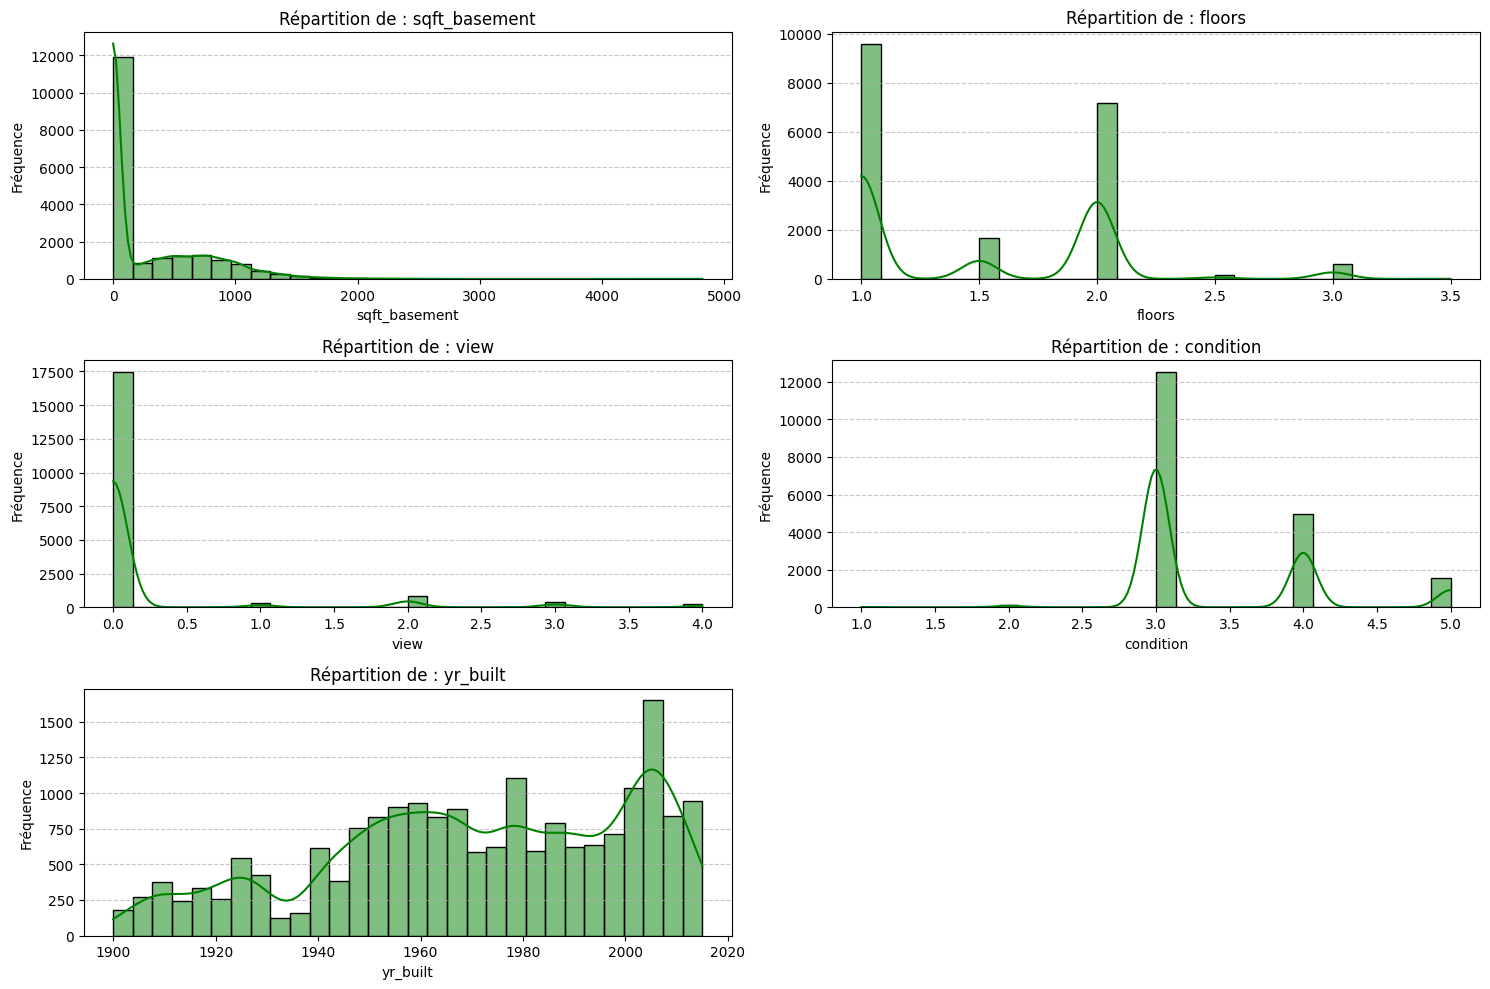

In [12]:
# Variables supplémentaires à explorer
variables_to_visualize = ['sqft_basement', 'floors', 'view', 'condition', 'yr_built']

plt.figure(figsize=(15, 10))

# Histogrammes pour chaque variable
for i, column in enumerate(variables_to_visualize, 1):
    plt.subplot(3, 2, i)
    sb.histplot(df[column], kde=True, bins=30, color='green')
    plt.title(f"Répartition de : {column}")
    plt.xlabel(column)
    plt.ylabel("Fréquence")
    plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


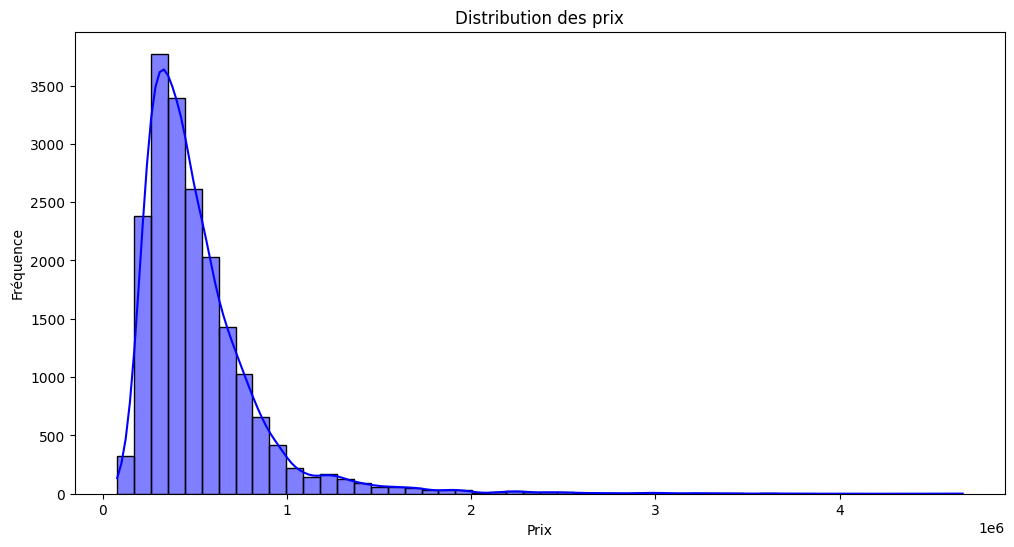

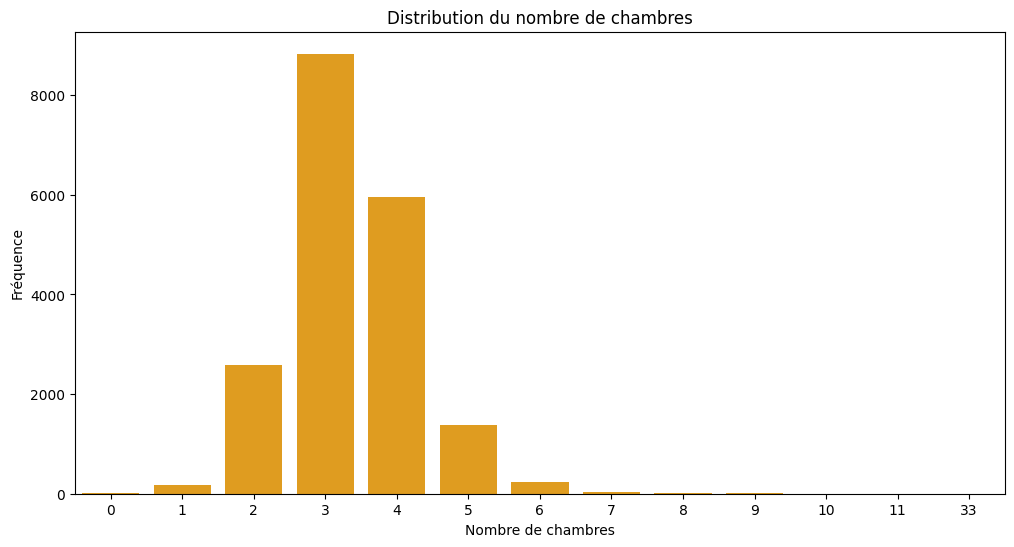

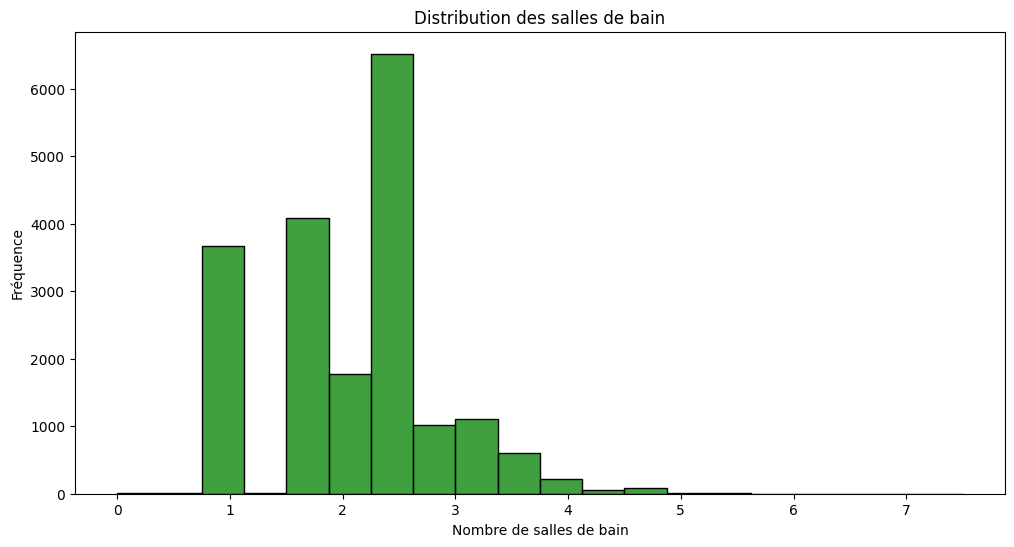

In [13]:
# Distribution des prix
plt.figure(figsize=(12, 6))
sb.histplot(df['price'], kde=True, bins=50, color='blue')
plt.title("Distribution des prix")
plt.xlabel("Prix")
plt.ylabel("Fréquence")
plt.show()

# Distribution des nombres de chambres
plt.figure(figsize=(12, 6))
sb.countplot(x=df['bedrooms'], color='orange')
plt.title("Distribution du nombre de chambres")
plt.xlabel("Nombre de chambres")
plt.ylabel("Fréquence")
plt.show()

# Distribution des salles de bain
plt.figure(figsize=(12, 6))
sb.histplot(df['bathrooms'], kde=False, bins=20, color='green')
plt.title("Distribution des salles de bain")
plt.xlabel("Nombre de salles de bain")
plt.ylabel("Fréquence")
plt.show()


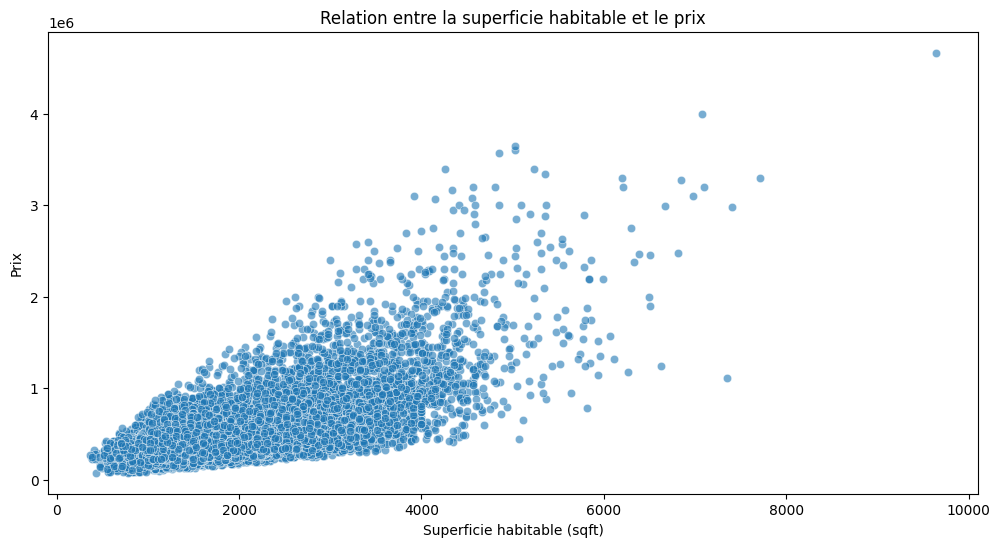

In [14]:
# Relation entre prix et superficie habitable
plt.figure(figsize=(12, 6))
sb.scatterplot(x='sqft_living', y='price', data=df, alpha=0.6)
plt.title("Relation entre la superficie habitable et le prix")
plt.xlabel("Superficie habitable (sqft)")
plt.ylabel("Prix")
plt.show()

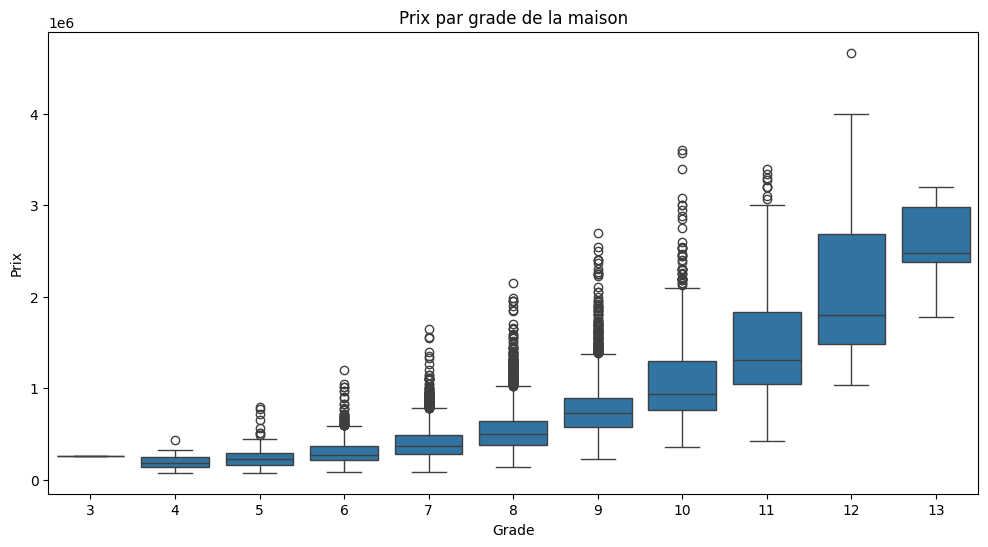

In [15]:
# Relation entre prix et grade
plt.figure(figsize=(12, 6))
sb.boxplot(x='grade', y='price', data=df)
plt.title("Prix par grade de la maison")
plt.xlabel("Grade")
plt.ylabel("Prix")
plt.show()

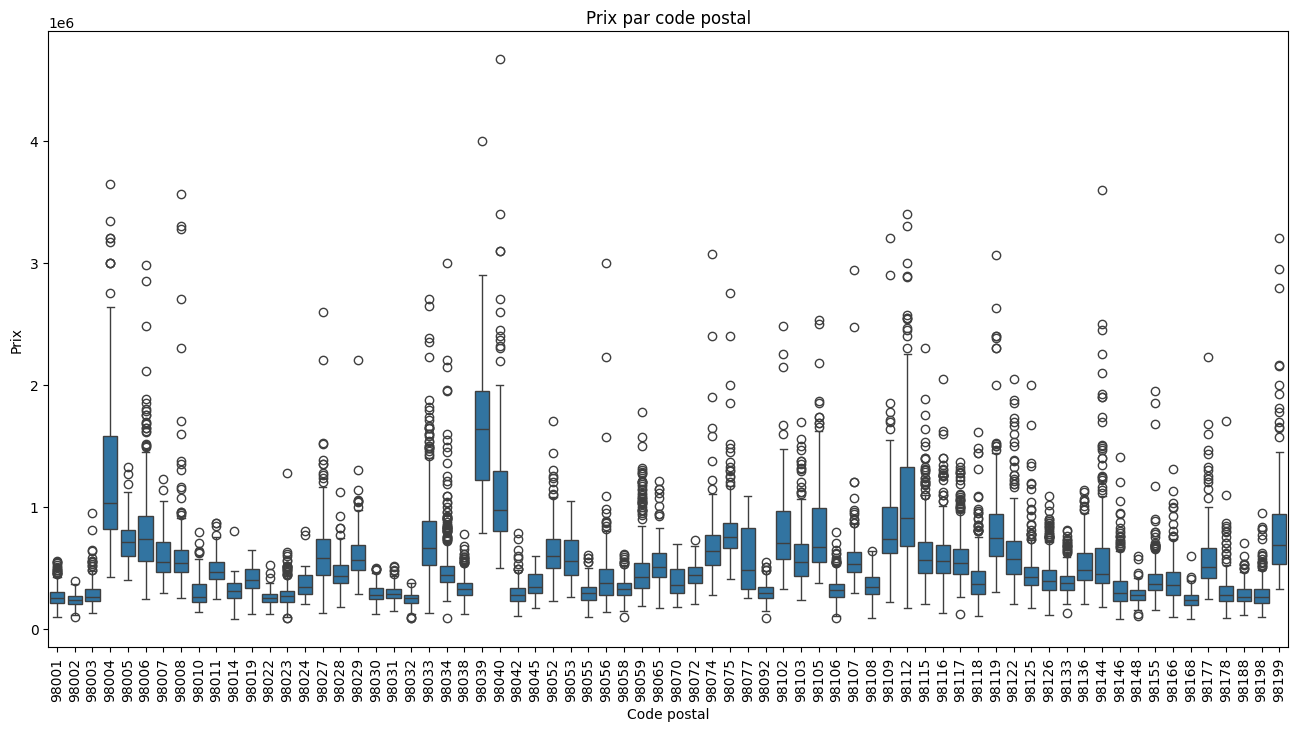

In [16]:
# Relation entre prix et code postal (zipcode)
plt.figure(figsize=(16, 8))
sb.boxplot(x='zipcode', y='price', data=df)
plt.xticks(rotation=90)
plt.title("Prix par code postal")
plt.xlabel("Code postal")
plt.ylabel("Prix")
plt.show()

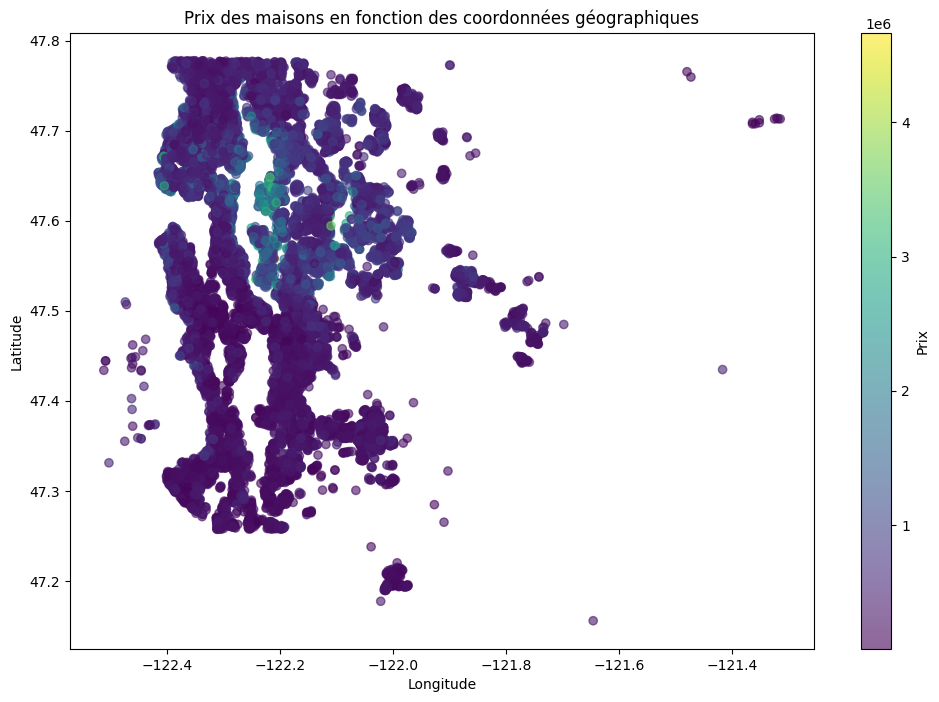

In [17]:
# Visualisation des prix en fonction des coordonnées géographiques
plt.figure(figsize=(12, 8))
scatter = plt.scatter(x=df['long'], y=df['lat'], c=df['price'], cmap='viridis', alpha=0.6)
plt.colorbar(scatter, label='Prix')
plt.title("Prix des maisons en fonction des coordonnées géographiques")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

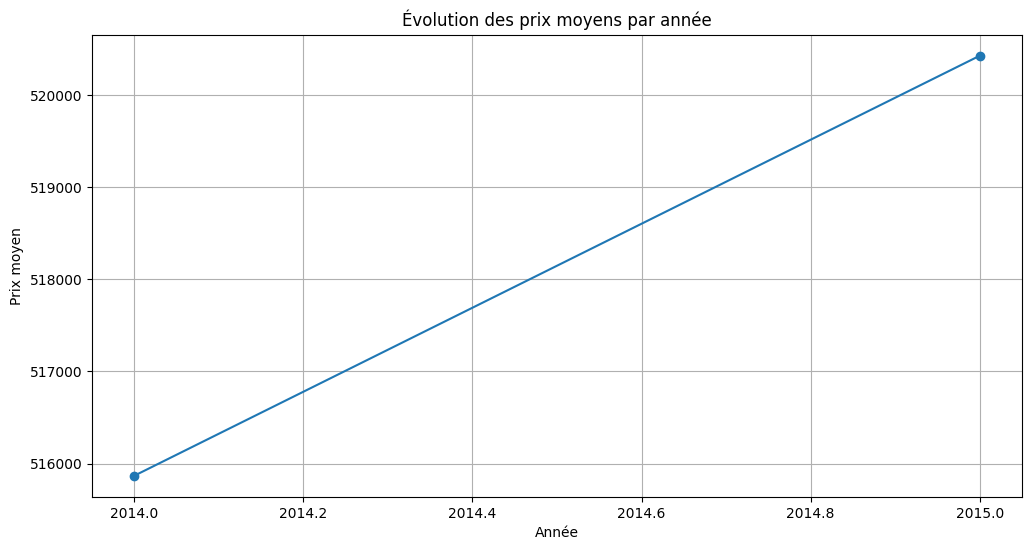

In [18]:
# Conversion de la colonne 'date' en type datetime
df['date'] = pd.to_datetime(df['date'])

# Ajout d'une colonne année pour l'analyse
df['year'] = df['date'].dt.year

# Prix moyen par année
avg_price_per_year = df.groupby('year')['price'].mean()

# Visualisation de l'évolution des prix moyens par année
plt.figure(figsize=(12, 6))
avg_price_per_year.plot(marker='o')
plt.title("Évolution des prix moyens par année")
plt.xlabel("Année")
plt.ylabel("Prix moyen")
plt.grid(True)
plt.show()

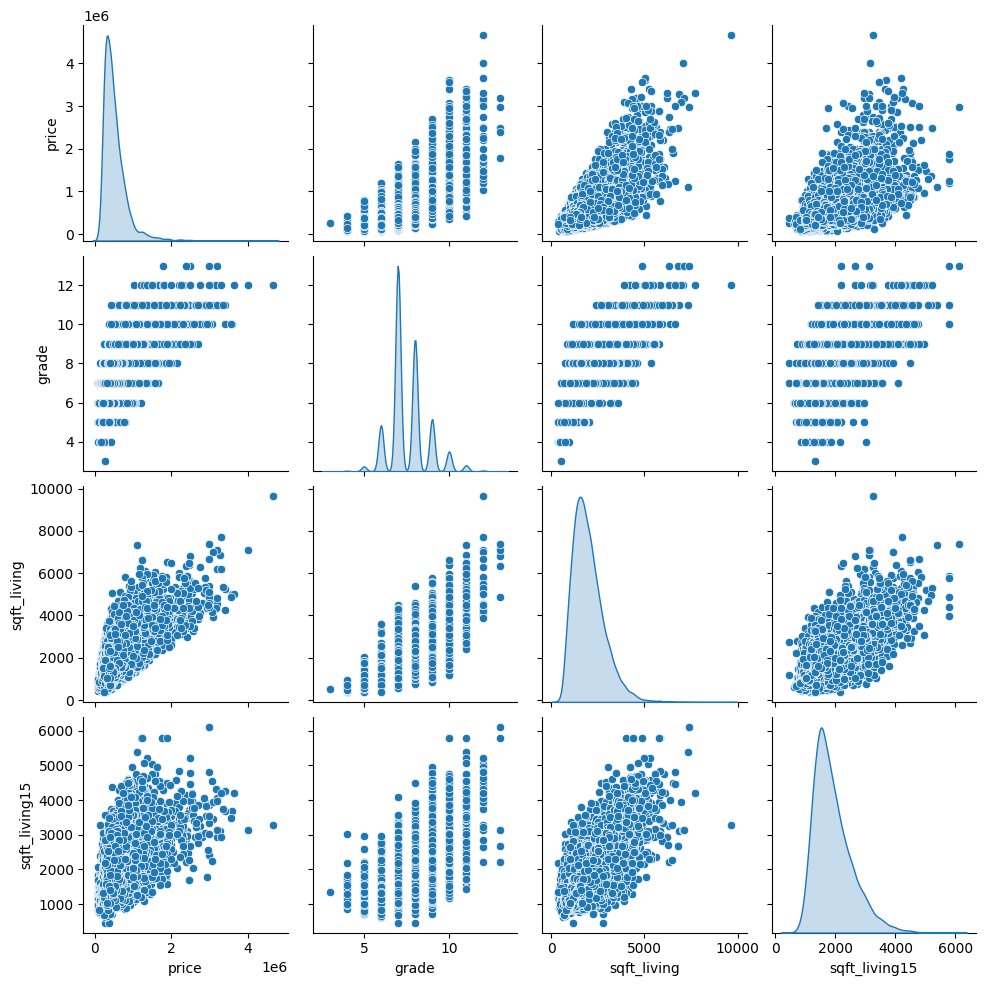

In [32]:
sb.pairplot(data = df, vars=['price','grade','sqft_living','sqft_living15'], diag_kind="kde")

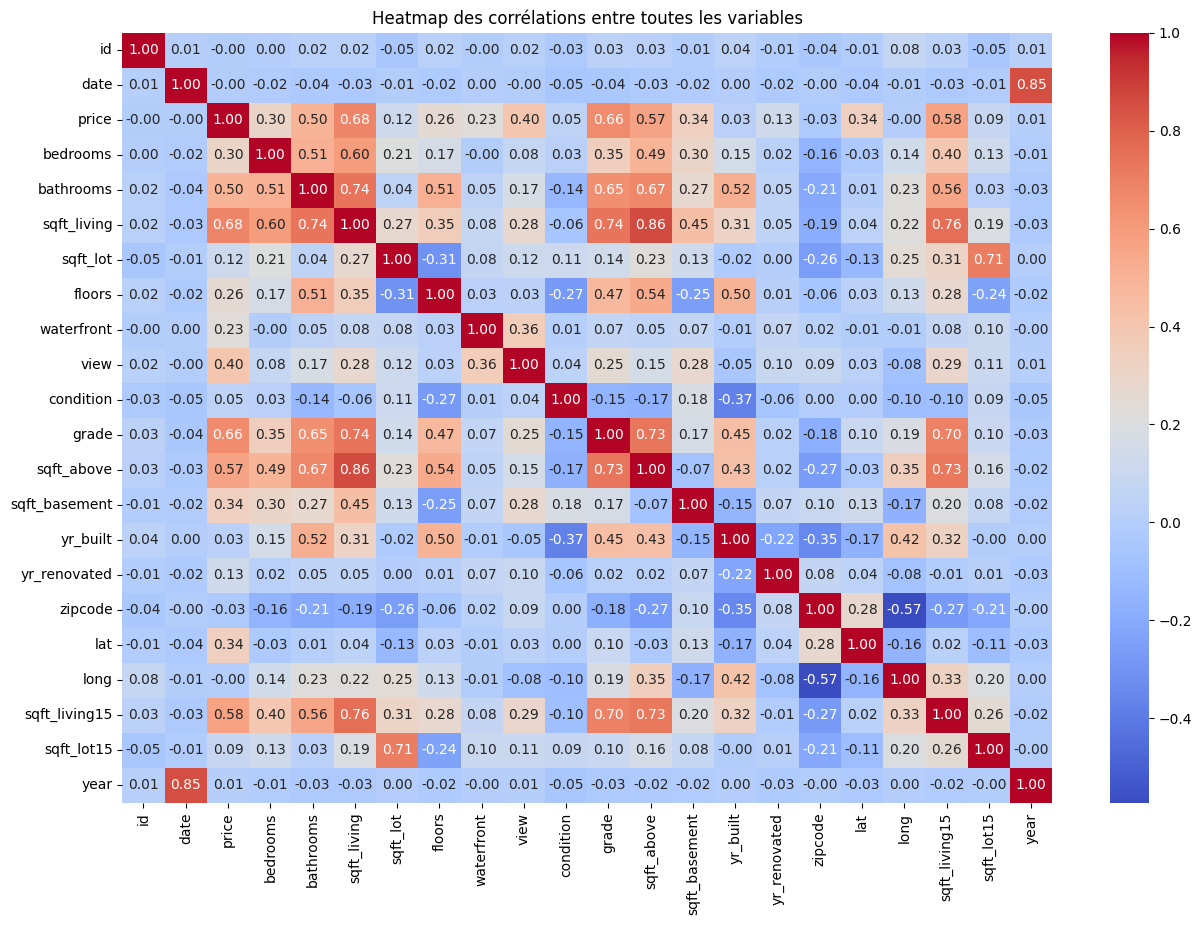

In [19]:
correlation_matrix = df.corr()

# Créer une heatmap pour toutes les variables
plt.figure(figsize=(15, 10))
sb.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title("Heatmap des corrélations entre toutes les variables")
plt.show()

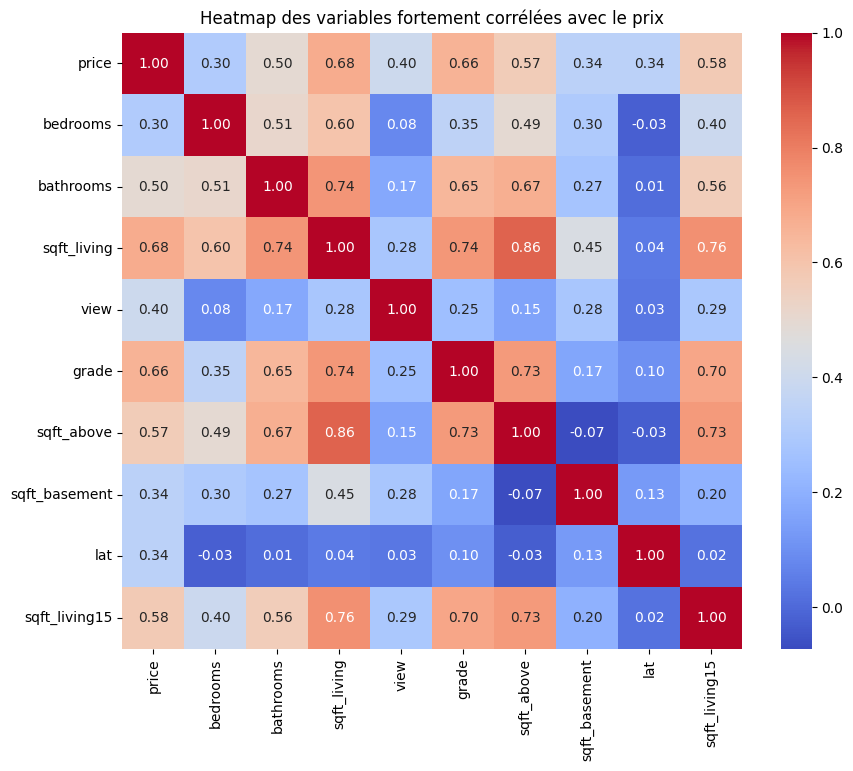

In [20]:
# Filtrer les variables avec une corrélation forte avec le prix
threshold = 0.3
strong_corr = correlation_matrix['price'][abs(correlation_matrix['price']) > threshold]

# Sélectionner ces variables
strong_corr_variables = strong_corr.index
filtered_corr_matrix = correlation_matrix.loc[strong_corr_variables, strong_corr_variables]

# Créer une heatmap pour les variables fortement corrélées avec le prix
plt.figure(figsize=(10, 8))
sb.heatmap(filtered_corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title("Heatmap des variables fortement corrélées avec le prix")
plt.show()


In [22]:
columns_to_keep = strong_corr.index
df = df[columns_to_keep]

# Afficher les colonnes restantes
print(f"Colonnes retenues : {list(df.columns)}")
print(f"Taille du DataFrame après filtrage : {df.shape}")


Colonnes retenues : ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'view', 'grade', 'sqft_above', 'sqft_basement', 'lat', 'sqft_living15']
Taille du DataFrame après filtrage : (19188, 10)


Grâce à cette heatmap précédente, nous pouvons tirer plusieurs conclusions :
Tout d'abord, on observe une corrélation entre les notes du début de lycée, les notes de fin de lycée, et les notes de l'enseignement supérieur.
Globalement, si on a de bonnes notes au lycée, on a davantage de chances d'avoir de bonne notes plus tard aussi.

On observe également des corrélations entre certains traits de personnalité. En effet, si une personne est extravertie, ouverte à de nouvelles expériences, facile à vivre et coopérative, ou conscientieuse, elle a plus de chances de posséder ces autres traits. De même, une personne neuroticiste, qui a tendance à ressentir des émotions négatives, a moins de chances de posséder ces autres traits.

Il est cependant intéressant de noter que ces traits de personnalité ne semblent pas avoir de corrélation particulière avec les notes obtenues et le salaire. Être neuroticiste semble donner un léger désavantage, et le fait d'être coopératif semble quant à lui donner un léger avantage tout du long mais c'est tout sinon.

Enfin, en ce qui concerne le salaire reçu, seules les notes obtenues semblent avoir un impact, en particulier les notes de lycée. Il est cependant important de noter que ces corrélations ont été observées pour les salaires inférieurs à 900 000$, car pour des salaires immenses comme 4 millions, les notes n'ont aucune importance.

En ce qui concerne les personnes percevant de très grands salaires (> 1 500 000 $), on obtient des résultats bien différents. En effet, on remarque d'abord qu'il existe une contre-proportionnalité entre le fait d'être quelq'un de facile à vivre, de consciencieux, d'extraverti, et le salaire perçu.
On remarque également que les notes reçues au lycées ou au collège ne semblent pas forcément avoir beaucoup d'importance.

Il semble donc que certaines spécialisations sont plus intéressantes que d'autres, en particulier les spécialisations liées à l'informatique et à l'électronique. Cependant, il ne s'agit pas là d'une grande corrélation, mais il y a quand même un lien.


En ce qui concerne les très grands salaires (> 900 000), c'est surtout la spécialisation "computer science & engineering

# 4. Préparation pour la modélisation
• Diviser les données en ensembles d'entraînement et de test <br>
• Normaliser/standardiser les features ( caractéristiques) si nécessaire

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler


# X = df.drop(columns=['id', 'price', 'date', 'lat', 'long'])  # Caractéristiques (features), en excluant la colonne cible
X = df.drop(columns=['price'])
y = df['price']  # Variable cible (target)

y_bins = pd.qcut(y, q=4, labels=False)
# Diviser les données en ensemble d'entraînement et de test (80% entraînement, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y_bins)

print("Ensemble d'entraînement :", X_train.shape)
print("Ensemble de test :", X_test.shape)


# Identifier les colonnes catégoriques
categorical_columns = X.select_dtypes(include=['object']).columns
numerical_columns = X.select_dtypes(include=['int64', 'float64']).columns
# OneHotEncoding pour les colonnes catégoriques
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_columns),
        ('num', StandardScaler(), numerical_columns)
    ],
    remainder='passthrough'
)

X_train_encoded = preprocessor.fit_transform(X_train)
X_test_encoded = preprocessor.transform(X_test)

Ensemble d'entraînement : (15350, 9)
Ensemble de test : (3838, 9)


# 5. Régression linéaire
• Implémenter une régression linéaire multiple pour prédire une variable continue <br>
• Évaluer le modèle (R², RMSE) et interpréter les coefficients

In [26]:
from pyexpat import model


def affichage_graph_reussite(X_test_scaled):
    # Prédictions sur l'ensemble de test
    y_test_pred = model.predict(X_test_scaled)

    # Graphique 1: Prédictions vs Réels
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_test_pred, color='blue', alpha=0.5)
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Ligne d'identité
    plt.title('Prédictions vs Valeurs réelles')
    plt.xlabel('Valeurs réelles')
    plt.ylabel('Prédictions')
    plt.show()

    # Graphique 2: Résidus
    residuals = y_test - y_test_pred
    plt.figure(figsize=(8, 6))
    sb.scatterplot(x=y_test_pred, y=residuals)
    plt.axhline(0, color='red', linestyle='--')
    plt.title('Graphique des résidus')
    plt.xlabel('Prédictions')
    plt.ylabel('Résidus')
    plt.show()

    # Graphique 3: Histogramme des résidus
    plt.figure(figsize=(8, 6))
    sb.histplot(residuals, kde=True, color='blue', bins=30)
    plt.title('Histogramme des résidus')
    plt.xlabel('Résidus')
    plt.ylabel('Fréquence')
    plt.show()

def pourcentage_reussite(y_test, y_test_pred, seuil=0.05):
    # Calculer la différence relative entre les valeurs réelles et prédites
    differences = np.abs(y_test - y_test_pred) / y_test
    # Calculer le pourcentage de prédictions qui sont inférieures au seuil
    correct_predictions = (differences < seuil).sum()
    total_predictions = len(y_test)
    pourcentage = (correct_predictions / total_predictions) * 100

    print(f"Pourcentage de réussite (valeurs proches à 5%) : {pourcentage:.2f}%")

def estimation_prix_maison(nouvelle_maison, model, preprocessor):
    # Convertir le dictionnaire en DataFrame
    nouvelle_maison_df = pd.DataFrame([nouvelle_maison])

    # Appliquer le préprocesseur sur la nouvelle maison
    nouvelle_maison_encoded = preprocessor.transform(nouvelle_maison_df)

    prix_estime = model.predict(nouvelle_maison_encoded)
    return prix_estime[0]

In [30]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

def entrainement_model (model):
    model.fit(X_train_encoded, y_train)

    # Prédire les valeurs sur l'ensemble d'entraînement et de test
    y_train_pred = model.predict(X_train_encoded)
    y_test_pred = model.predict(X_test_encoded)

    # Évaluer les performances du modèle
    train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
    test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    # Afficher les métriques de performance
    print(f"Performances avec {model.__class__.__name__} :")
    print(f"  - RMSE entraînement : {train_rmse:.2f}")
    print(f"  - R² entraînement   : {train_r2:.2f}")
    print(f"  - RMSE test         : {test_rmse:.2f}")
    print(f"  - R² test           : {test_r2:.2f}")
    pourcentage_reussite(y_test, y_test_pred, seuil=0.05)

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model = LinearRegression()

entrainement_model(model)
#affichage_graph_reussite(X_test_encoded)
#affichage_pourcentage_reussite()

nouvelle_maison = {
    "bedrooms": 3,
    "bathrooms": 1,
    "sqft_living": 1180,
    "sqft_lot": 5650,
    "floors": 1,
    "waterfront": 0,
    "view": 0,
    "condition": 3,
    "grade": 7,
    "sqft_above": 1180,
    "sqft_basement": 0,
    "yr_built": 1955,
    "yr_renovated": 0,
    "zipcode": "98178",
    "lat": 47.5112,
    "long": -122.257,
    "sqft_living15": 1340,
    "sqft_lot15": 5650
}#prix attendu 221900


# Estimation du prix
prix_estime = estimation_prix_maison(nouvelle_maison, model, preprocessor)
print(f"Le prix estimé de la maison est : ${prix_estime:,.2f} pour $221,900")


Performances avec LinearRegression :
  - RMSE entraînement : 194666.24
  - R² entraînement   : 0.64
  - RMSE test         : 187503.89
  - R² test           : 0.65
Pourcentage de réussite (valeurs proches à 5%) : 14.23%
Le prix estimé de la maison est : $287,821.96 pour $221,900


/Users/adrienne/Docus/GitHub/Projet_python_data/.conda/lib/python3.11/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/adrienne/Docus/GitHub/Projet_python_data/.conda/lib/python3.11/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


# 6. Classification et Machine Learning
• Comparer ces algorithmes et choisir le plus adapté pour votre étude : <br>
    •  Régression logistique<br>
    • Arbre de décision<br>
    • Random Forest<br>
• SVM<br>
• Évaluer les performances (précision, rappel, F1-score, courbe ROC)<br>
• Optimiser les hyperparamètres avec GridSearchCV ou RandomizedSearchCV

# 8. Prédiction et Déploiement du Modèle
• Sélectionner le meilleur modèle basé sur les performances<br>
• Entraîner le modèle final sur l'ensemble des données<br>
• Créer une fonction de prédiction qui prend en entrée des caractéristiques
(features) et permet de prédire des résultats (à vous de préciser quel type de 
résultat prédire)<br>
• Développer une interface simple pour utiliser le modèle (par exemple, avec 
Streamlit ou Flask)


# 9. Interprétation et conclusions
• Résumer les principaux insights de l'analyse<br>
• Identifier les facteurs les plus importants pour la prédiction selon le domaine 
choisi<br>
• Proposer des recommandations basées sur les résultats